In [1]:
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
def read_task_set_from_txt(file):
    task_set = []
    with open(file, 'r') as txtfile:
        for line in txtfile:
            task = tuple(map(int, line.strip()[1:-1].split(', ')))
            task_set.append(task)
    return task_set

In [3]:
def readap(file):
    task_set = []
    with open(file, 'r') as txtfile:
        for line in txtfile:
            task = tuple(map(int, line.strip()[1:-1].split(', ')))
            task_set.append(task)
    return task_set

In [4]:
data=read_task_set_from_txt('task_set.txt')
df = pd.DataFrame(data, columns=['id', 'execution', 'arrival', 'period', 'dead'])
df['rem']=df['execution']
df['nextdead']=df['period']
df=df.drop(columns=['dead'])
# Print the DataFrame
print(df)

    id  execution  arrival  period  rem  nextdead
0    1         17        0     399   17       399
1    2         14        0     461   14       461
2    3         25        0     422   25       422
3    4         10        0     482   10       482
4    5         13        0     300   13       300
5    6         11        0     477   11       477
6    7         14        0     477   14       477
7    8         15        0     487   15       487
8    9         20        0     383   20       383
9   10         17        0     483   17       483
10  11         23        0     481   23       481
11  12         10        0     451   10       451
12  13         16        0     468   16       468
13  14         18        0     171   18       171
14  15         10        0     429   10       429


In [5]:
task_setap = readap("APtask_set.txt")
data = task_setap
dfap = pd.DataFrame(data, columns=['id','execution','arrival'])
dfap


,id,execution,arrival
0,1,12,24
1,2,19,8
2,3,17,51
3,4,10,9
4,5,18,36
5,6,14,53
6,7,12,49
7,8,13,36
8,9,18,8
9,10,19,13


In [6]:
import math
import pandas as pd
def lcm(x, y):
    return x * y // math.gcd(x, y)

def calculate_hyper_period(df):
    periods = df['period'].tolist()
    hyper_period = periods[0]
    for period in periods[1:]:
        hyper_period = lcm(hyper_period, period)
    return hyper_period

def calculate_frame_size(df,hyper_period):
    max_execution_time = df['execution'].max()
    max_period = df['period'].max()
    
    frame_size = max_execution_time
  
    while True:
        if frame_size >= max_execution_time:
            if all(2 * frame_size - math.gcd(period, frame_size) <= deadline for period, deadline in zip(df['period'], df['nextdead'])):
                if hyper_period % frame_size == 0:
                    return frame_size
        frame_size = lcm(frame_size, max_period)



In [7]:
hp=calculate_hyper_period(df)
frame_size = calculate_frame_size(df,hp)
print("Frame Size:", frame_size)

Frame Size: 25


In [8]:
print(hp)

138403678419407431142412300


In [9]:
def calslack(df,framesize): 
    sum=0
    if(len(df)>0): 
        for i in df['rem']: 
            sum+=i
        slack=frame_size-sum 
        if(slack>0): 
            return slack 
        else:
            return 0
    else: 
        return frame_size
            

In [10]:
apin = 0
sc = []
ap = []
fn = frame_size * 5  # showing 5 frames
for j in range(0, fn):
    frame_start = j * frame_size
    task = df[(df['arrival'] <= frame_start) & (df['rem'] > 0)]
    slack = calslack(task, frame_size)
    for i in range(frame_size):
        task = df[(df['arrival'] <= frame_start) & (df['rem'] > 0)]
        totaltill = j * frame_size + i
        aptask = dfap[(dfap['arrival'] <= totaltill) & (dfap['execution'] > 0)]

        if (slack != 0) and len(aptask) > 0 and apin < len(dfap):
            nextap = dfap.index[apin]
            dfap.loc[nextap, 'execution'] -= 1
            slack -= 1
            if dfap.loc[nextap, 'execution'] == 0:
                apin += 1

            if ap and totaltill > 0 and ap[-1]['id'] == dfap.loc[nextap, "id"] and ap[-1]['end time'] == totaltill:
                ap[-1]['end time'] += 1
                ap[-1]['total time'] += 1
            else:
                dict_ap = {'id': dfap.loc[nextap, "id"], 'start time': totaltill, 'end time': totaltill + 1,
                           'total time': 1}
                ap.append(dict_ap)

        else:
            if len(task) > 0:
                nexttask = task.sort_values('nextdead').index[0]
                df.loc[nexttask, "rem"] = df.loc[nexttask, "rem"] - 1
                if totaltill > 0 and sc and sc[-1]['id'] == df.loc[nexttask, "id"] and sc[-1][
                    'end time'] == totaltill:
                    sc[-1]['end time'] += 1
                    sc[-1]['total time'] += 1
                else:
                    new_id = df.loc[nexttask, "id"]
                    new_task = {'id': new_id, 'start time': totaltill, 'end time': totaltill + 1, 'total time': 1}
                    sc.append(new_task)

        arrived = df[(totaltill + 1) % df['period'] == 0].index
        df.loc[arrived, 'rem'] = df.loc[arrived, 'execution']
        df.loc[arrived, 'nextdead'] = df.loc[arrived, 'nextdead'] + df.loc[arrived, 'period']


In [11]:
sc1=pd.DataFrame(sc)
sc1

,id,start time,end time,total time
0,14,0,18,18
1,5,18,31,13
2,9,31,51,20
3,1,51,68,17
4,3,68,93,25
...,...,...,...,...
141,5,3000,3013,13
142,15,3013,3023,10
143,9,3064,3078,14
144,14,3078,3096,18


In [12]:
ap1=pd.DataFrame(ap)
ap1

,id,start time,end time,total time
0,1,250,262,12
1,2,262,274,12
2,2,275,282,7
3,3,282,299,17
4,4,299,309,10
5,5,309,312,3
6,5,325,340,15
7,6,340,354,14
8,7,354,357,3
9,7,375,384,9


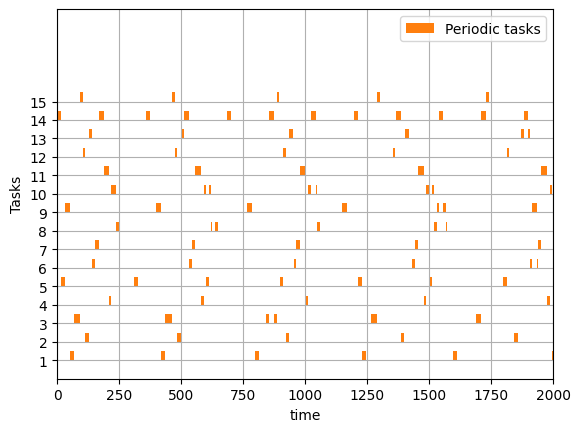

In [13]:
import matplotlib.pyplot as plt

fig, gnt = plt.subplots()
gnt.set_ylim(0,10*(len(df)+5))
gnt.set_xlim(0, 2000)
gnt.set_xlabel('time')
gnt.set_ylabel('Tasks')
orange_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:orange", edgecolor='none')
tick=10
tc=[]
lab=[]
for i in df['id']:
    tc.append(tick)
    lab.append(i)
    tick+=10

gnt.set_yticks(tc)
gnt.set_yticklabels(lab)
gnt.grid(True)

for item in sc:
    gnt.broken_barh([(item['start time'], item['end time']-item['start time'])], (10*item['id'], 5), facecolors =('tab:orange'))
    gnt.legend([orange_patch], ['Periodic tasks'], loc='upper right')

plt.show()

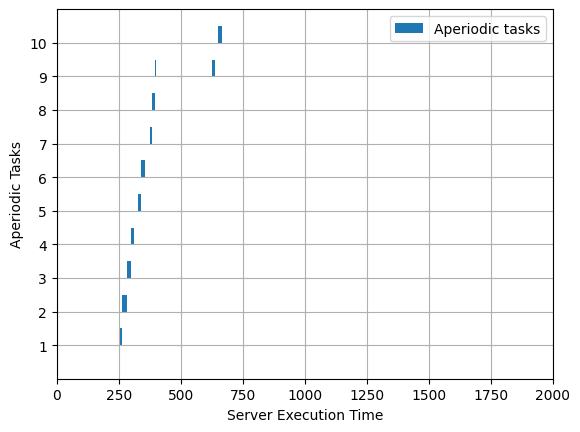

In [14]:
import matplotlib.pyplot as plt

fig, gnt = plt.subplots()
gnt.set_ylim(0, 10*len(dfap)+10)
gnt.set_xlim(0, 2000)
gnt.set_xlabel('Server Execution Time')
gnt.set_ylabel('Aperiodic Tasks')
tick = 10
tc = []
lab = []
for j in dfap['id']:
    tc.append(tick)
    lab.append(j)
    tick += 10
gnt.set_yticks(tc)
gnt.set_yticklabels(lab)
gnt.grid(True)
blue_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:blue", edgecolor='none')
gnt.legend([blue_patch], ['Aperiodic tasks'], loc='upper right')
for item in ap:
    gnt.broken_barh([(item['start time'], item['end time'] - item['start time'])],
                    (10 * item['id'], 5), facecolors=('tab:blue'))

plt.show()
